In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
model_params = {
    'reaction_speed':10, # the size of step of signal in binary model
    'max_reward':60, # maximum reward for iteration
    'angle_loss_coeff':300000, # coef before punish for dismiss an angle
    'over_force_loss_coeff':0, # coef before punish for inapropriate force (signals out of range [800, 2300])
    'upper_force_loss_coeff':3, # coef before punish for missing total force on y-axis. target_force is a target.
    'step_size':1e-3, # time length of iteration in seconds
    'target_upper_force':5.0, # total force on y-axis which wanted to be achieved and stated.
    'gamma':0.99, # discount factor
}

In [3]:
import matplotlib.pyplot as plt
from Copter.Session import Session
from Copter.Network import Network
net = Network(3, 4)
s = Session(net, **model_params)

In [4]:
s.train_model(10, 1000, False)

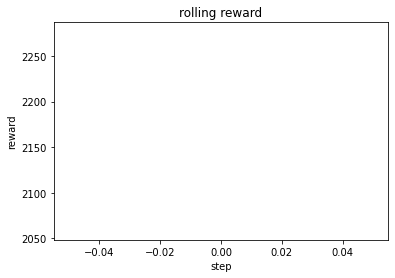

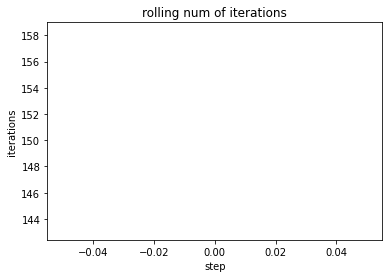

In [5]:
s.plot_trained_logs(window_size=10)

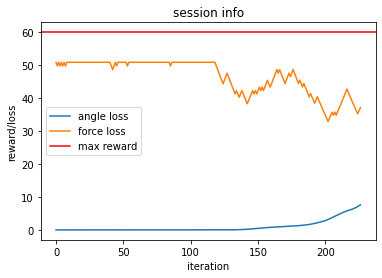

In [6]:
s.plot_info()

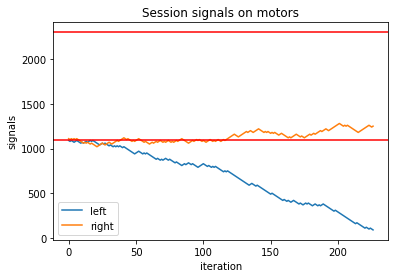

In [7]:
s.plot_signals()

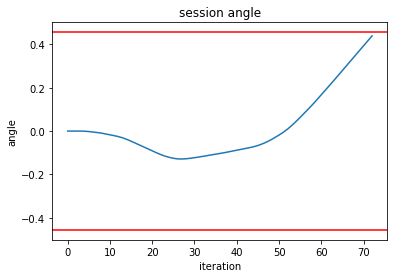

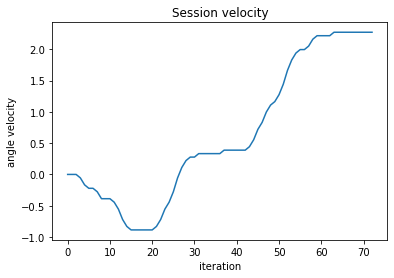

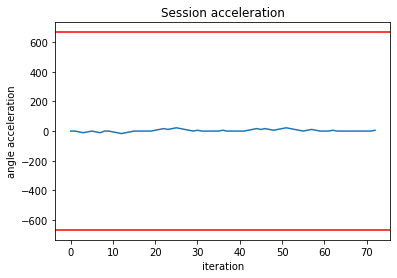

In [138]:
s.plot_states()

In [332]:
s.plot_actions()

AttributeError: 'Session' object has no attribute 'plot_actions'

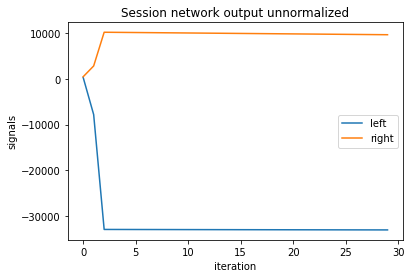

In [145]:
s.plot_signals()

In [14]:
from utils import compute_total_J
compute_total_J(False)

21.8


12956637.786666665

In [63]:
from Copter.Session import Session
s = Session()
s.run(10)

d:\STUDY\code\ML notebooks\my\copter\Copter\TwoMotorStick.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probas = F.softmax(logits).numpy()


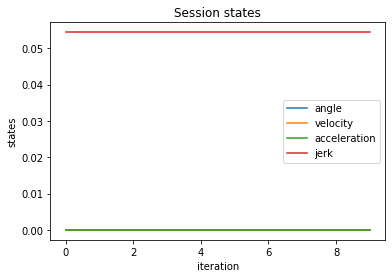

In [64]:
s.plot_states()

In [1]:
# all parameters in mm's and gramms

# STICK_LENGTH = 370.
# STICK_HEIGHT = 59.
# STICK_MASS = 196.

# MOTOR_MASS = 67.
# MOTOR_DISTANCE = 158.
# MOTOR_HEIGHT = 50.

# REGULATOR_MASS = 24.
# REGULATOR_DISTANCE = 70.
# REGULATOR_HEIGHT = 32.

# CENTER_AXIS_IDENT = 17.5
# PILLAR_HEIGH = 0
from model_parameters import *
2 * (MOTOR_MASS * MOTOR_HEIGHT + REGULATOR_MASS * REGULATOR_HEIGHT) \
    / (2 * MOTOR_MASS + 2 * REGULATOR_MASS + STICK_MASS)

21.788359788359788

In [1]:
import torch

In [10]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.vstack([a, b])
torch.square(c)

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch


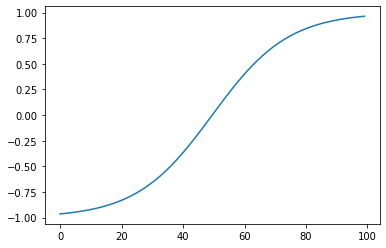

In [22]:
space = np.linspace(-2, 2, 100)
ans = []
for a in space:
    ans.append(torch.tanh(torch.tensor(a)).item())
plt.plot(ans)

In [44]:
import math
mean = 1
var = 1

In [45]:
np.random.normal(mean, var)

1.3196001152839887

In [46]:
a = np.array([1, 3])
a.tolist()

[1, 3]

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [167]:
df = pd.read_csv('Motor force detection.csv')

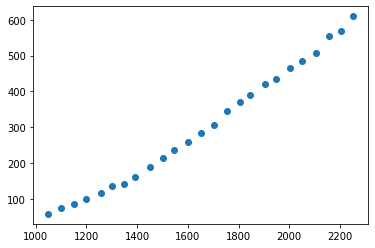

In [168]:
plt.scatter(x=df.input, y=df.mass)

In [169]:
lr = LinearRegression()
lr.fit(df.drop('mass', axis=1), df.mass)

LinearRegression()

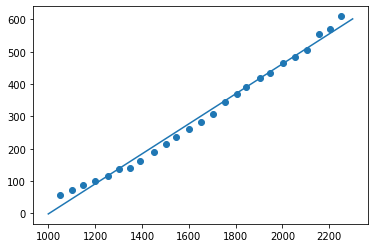

In [170]:
space = np.linspace(1000, 2300)
preds = lr.intercept_ + lr.coef_[0] * space
plt.plot(space, preds)
plt.scatter(x=df.input, y=df.mass)
plt.show()

In [171]:
np.array([lr.intercept_, lr.coef_[0]]) * 1e-3 * 9.8

array([-4.56204418e+00,  4.54791687e-03])

In [172]:
lr.predict(np.array([[2300]]))

array([601.85353414])

In [173]:
np.random.choice(2, 1, p=np.array([0.3, 0.7]))[0]

[autoreload of Copter.TwoMotorStick failed: Traceback (most recent call last):
  File "C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "d:\STUDY\code\ML notebooks\my\copter\Copter\TwoMotorStick.py", line 4, in 

1

In [192]:
a = torch.rand(4,4)
a

tensor([[0.1376, 0.8149, 0.3219, 0.1905],
        [0.3193, 0.3232, 0.3588, 0.0897],
        [0.7505, 0.8373, 0.6066, 0.6727],
        [0.3603, 0.9797, 0.6747, 0.3969]])

In [193]:
a[:, :2]

tensor([[0.1376, 0.8149],
        [0.3193, 0.3232],
        [0.7505, 0.8373],
        [0.3603, 0.9797]])